# **Introduction to Computer Vision.Lab 09.Convolutional Neural Networks II, Bag of Tricks I: Mini-Batch Gradient Descent**

## **Theory:**

**Convolutional Neural Networks (CNNs):**
Convolutional Neural Networks are a class of deep learning models designed to process data with a grid-like topology, such as images. They are particularly effective for image classification tasks due to their ability to capture spatial hierarchies in data through convolutional layers.

1. **Convolutional Layer:**
   - Applies a set of filters to the input data, which convolve across the width and height of the input volume, computing the dot product between the entries of the filter and the input.
   - Captures spatial relationships in the data.
   - Followed by activation functions like ReLU to introduce non-linearity.

2. **Pooling Layer:**
   - Performs down-sampling, reducing the spatial dimensions of the input volume.
   - Helps in making the detection of features invariant to scale and orientation changes.

3. **Fully Connected Layer:**
   - Flattens the input from previous layers and passes it through one or more dense layers.
   - Each neuron in a fully connected layer is connected to every neuron in the previous layer, allowing for the combination of features learned by previous layers.

4. **Softmax Activation:**
   - Applied to the output layer to obtain probability distributions over classes.

**Mini-Batch Gradient Descent:**
Mini-Batch Gradient Descent is an optimization algorithm that combines the benefits of both Stochastic Gradient Descent (SGD) and Batch Gradient Descent. It splits the training data into small batches and performs an update for each batch. This method helps in achieving a good balance between the convergence speed and the stability of parameter updates.

**Benefits:**
- **Efficiency:** Allows for efficient computation by leveraging vectorized operations.
- **Convergence:** Achieves faster convergence compared to full batch updates.
- **Memory Utilization:** Makes efficient use of memory, especially on large datasets.


## **Excercise 1: Implement the convolutional neural network shown below, using mini-batch gradient descent, and perform image classification on a dataset of your choice**

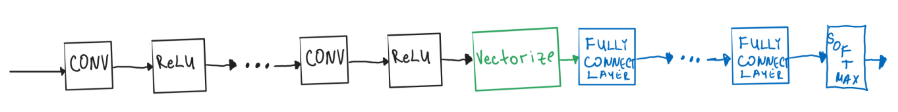

### Convolutional Neural Network Implementation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set a fixed random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
def load_data(dataset='cifar10'):
    if dataset == 'cifar10':
        (X_train, y_train), (X_test, y_test) = cifar10.load_data()
        X_train = ''' TO DO '''
        X_test = ''' TO DO '''
    elif dataset == 'mnist':
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
        X_train = np.expand_dims(X_train, axis=-1).astype('float32') / 255.0
        X_test = np.expand_dims(X_test, axis=-1).astype('float32') / 255.0
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, y_train, X_test, y_test

# Define model
def build_model(input_shape, num_classes):
    model = ''' TO DO '''
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')
    model.add(Flatten())
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')

    # Assert that the model architecture is correct
    assert len(model.layers) == 7, "Unexpected number of layers in the model"
    assert isinstance(model.layers[0], Conv2D), "First layer should be Conv2D"
    assert isinstance(model.layers[-1], Dense), "Last layer should be Dense"
    assert model.output_shape[-1] == num_classes, f"Output layer should have {num_classes} units"

    return model

# Load data
X_train, y_train, X_test, y_test = load_data(dataset='cifar10')  # Change to 'mnist' if using MNIST

# Build and compile model
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model using mini-batch gradient descent
batch_size = 64
epochs = 10
history = model.fit(''' TO DO ''')

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Assert that the final loss is below a certain threshold
max_loss = 1.0  
assert loss < max_loss, f"Model loss is too high: {loss}, expected less than {max_loss}"

# Assert accuracy is above a certain threshold if needed
min_accuracy = 0.5  # Example threshold
assert accuracy > min_accuracy, f"Model accuracy is too low: {accuracy}, expected at least {min_accuracy}"

## **Theory:**

**Using TensorFlow/Keras for Convolutional Neural Network**

This part of the exercise demonstrates the flexibility and power of using high-level deep learning libraries such as TensorFlow/Keras for building and training convolutional neural networks. These libraries provide an intuitive and user-friendly API for implementing complex models with minimal code, leveraging optimized backend operations.

**Benefits of High-Level Libraries:**

**Ease of Use:** Simplified syntax and modular components make it easy to build and experiment with different neural network architectures.

**Optimized Performance:** Efficient computation through optimized backend engines (e.g., TensorFlow, Theano).

**Predefined Layers and Functions:** Access to a wide range of pre-built layers, loss functions, and optimizers, reducing the need to implement these from scratch.

**Community Support and Documentation:** Extensive resources and community support to assist with model development and troubleshooting.

## **Excercise 2: Code the same convolutional neural network as in 1) but now using any libraries/packages/functions you wish. Then perform image classification with the convolutional neural network in 2) instead of the one in 1)**

### Using TensorFlow/Keras for Convolutional Neural Network

In [ ]:
import numpy as np
import tensorflow as tf

# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load data again for clarity
X_train, y_train, X_test, y_test = ''' TO DO '''  # Change to 'mnist' if using MNIST

# Ensure the data shapes are correct
assert X_train.shape[0] == y_train.shape[0], "Number of training samples does not match the number of labels."
assert X_test.shape[0] == y_test.shape[0], "Number of test samples does not match the number of labels."

# Define the input shape and number of classes (assuming CIFAR-10)
input_shape = X_train.shape[1:]
num_classes = 10  # CIFAR-10 has 10 classes

# Build and compile the model
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using mini-batch gradient descent
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy =''' TO DO '''
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Add an assertion to check if the loss is below a certain threshold
loss_threshold = 1.0 
assert loss < loss_threshold, f"Model loss is too high: {loss}, expected to be below {loss_threshold}."

# Ensure the accuracy is within a reasonable range
accuracy_threshold = 0.6
assert accuracy > accuracy_threshold, f"Model accuracy is too low: {accuracy}, expected to be above {accuracy_threshold}."


# **Conclusion**

* Implementing a CNN with mini-batch gradient descent effectively combines the strengths of convolutional layers for feature extraction and mini-batch optimization for efficient learning. This approach is widely used in practical image classification tasks due to its robustness and performance.

* Utilizing high-level libraries like TensorFlow/Keras significantly streamlines the process of developing and training neural networks. This approach allows for rapid prototyping and experimentation, enabling researchers and practitioners to focus on model architecture and hyperparameter tuning rather than low-level implementation details.

